<h1>Сердечная недостаточность 🫀 - Лабороторная работа 2<h1>

<h7>Критерии оценки:<h7>

<ul>
  <li><input type="checkbox"> Произведено разбиение датасета на тренировочную/тестовую выборки - 2 балла </li>
  <li><input type="checkbox"> Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла </li>
  <li><input type="checkbox" checked> Бейзлайновая модель из простого семейства (линейные модели, деревья решений, knn...) обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 6 баллов</li>
  <li><input type="checkbox" checked> Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла</li>
  <li><input type="checkbox" checked> Обеспечена воспроизводимость решения: зафиксированы random_state, ноутбук воспроизводится от начала до конца без ошибок - 3 балла </li>
  <li><input type="checkbox" checked> Соблюден code style на уровне pep8 и On writing clean Jupyter notebooks - 4 балла</li>
  <li><input type="checkbox" checked> Принимаемые решения обоснованы и прокомментированы в markdown ячейках (то есть, например, если для кодирования категориальных переменных выбран метод Label Encoding, то текстом написано, почему он, и тп) - 10 баллов</li>
</ul>

<h3>Импорт библиотек<h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<h3>Фиксирую константу<h3>

In [3]:
RANDOM_STATE = 36
PATH = 'heart.csv'

<h3>Просмотр данных<h3>

In [4]:
df = pd.read_csv(PATH)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Деление на тестовую и обучающую выборку<h3>

In [5]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
        'exng', 'oldpeak', 'slp', 'caa', 'thall']]                              
y = df['output']                                                                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# X_train
# X_test

# X_train_scaled
# X_test_scaled

(X_train.shape, X_train_scaled.shape)

((227, 13), (227, 13))

<h3>Baseline<h3>

In [8]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy_clf.fit(X_train_scaled, y_train)

DummyClassifier(random_state=36, strategy='most_frequent')

<h2>

<h3>Логистическая регрессия<h3>

In [9]:
log_reg = LogisticRegression(max_iter=100, random_state=RANDOM_STATE)       # Увеличение max_iter для сходимости
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=36)

<h3>Accuracy (Точность)<h3>

In [10]:
y_pred_dummy = dummy_clf.predict(X_test_scaled)
f1_score(y_test, y_pred_dummy)

np.float64(0.743801652892562)

In [11]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
f1_score(y_test, y_pred_log_reg)

np.float64(0.8686868686868687)

In [12]:
confusion_matrix(y_test, y_pred_log_reg)

array([[20, 11],
       [ 2, 43]])

In [13]:
confusion_matrix(y_test, y_pred_dummy)

array([[ 0, 31],
       [ 0, 45]])

In [14]:
print(f'F1 for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1 for Logistic regression: 0.8686868686868687


In [15]:
print(f'F1 for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')

F1 for Dummy Classificator: 0.743801652892562


In [16]:
print(f'ROC-AUC for Logistic regression: {roc_auc_score(y_test, y_pred_log_reg)}')

ROC-AUC for Logistic regression: 0.8003584229390682


In [17]:
print(f'ROC-AUC for Dummy Classificator: {roc_auc_score(y_test, y_pred_dummy)}')

ROC-AUC for Dummy Classificator: 0.5


<h3> ROC-кривая <h3>

In [18]:
def plot_roc_auc(fpr, tpr, thresholds, title): 
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

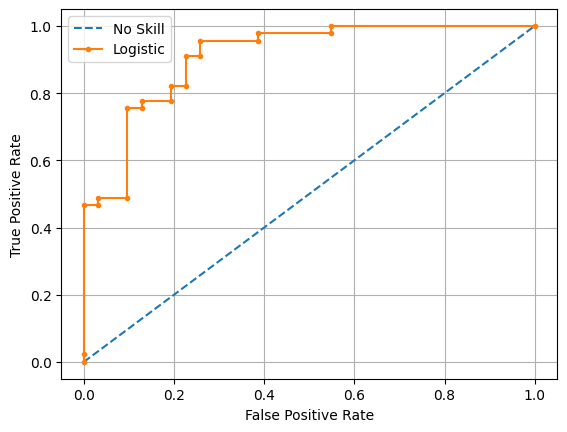

In [19]:
y_pred = log_reg.predict_proba(X_test_scaled)[:, 1]        
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

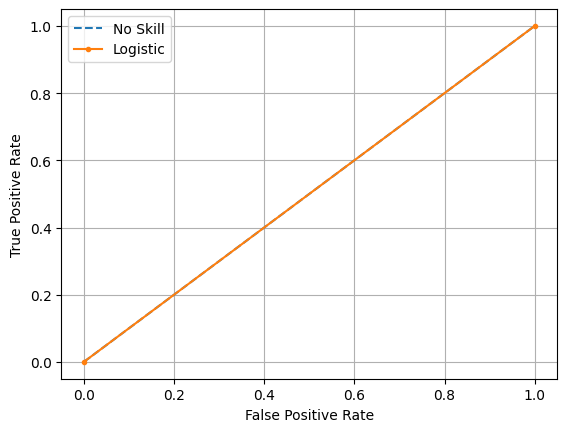

In [20]:
y_pred = dummy_clf.predict_proba(X_test_scaled)[:, 1]      
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Dummy')